<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
60 percent

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with him. He does not know from which possibility he took the troll from. Since he doesn't he only has a 33.3 percent chance since he eliminated the 60 percent possibility of having all gnomes so its only between E1 and E2.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

####Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [1]:
#####P(A)=probabilty of crossing bridge safely
######P(B)=crossing bridge after troll captured
2/5*.5/(2/5*.5+1/5*.5)=2/3
P(trollcaptured|E1)=2/5
P(E1)=.5
P(trollcaptured)=2/5*.5+1/5*.5
2/5*.5/(2/5*.5+1/5*.5)=2/3
P(E1)=2/3
2/3

LoadError: syntax: "((2 / 5) * 0.5)" is not a valid function argument name around In[1]:3

Probability of the other event given a troll captured: 

In [ ]:
P(trollcaptured|E2)=1/5
P(E2)=.5
P(trollcaptured)=2/5*.5+1/5*.5
1/5*.5/(2/5*.5+1/5*.5)=2/3
P(E2)=1/3

### 1.5

#### What is the chance of the knight crossing safely?

In [ ]:
has to be event e2
1/3 33.3 percent chance

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\mckoc\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\mckoc\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\mckoc\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random
using Plots
using Polynomials
using Random
using Distributions

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [4]:
x=(-10:10)
y_true=x .^2 .+ 3x .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [22]:
noises=10
d=di.Normal(0,noises)
y_observed=y_true+rand(d,length(x))

21-element Vector{Float64}:
  45.04323457544899
  41.885962995794344
  41.627997151197526
  21.12803595730142
  23.96638966103785
   0.8562083136354985
  -0.4947411852243966
  -1.9144133401041052
 -24.02548426199366
  -6.225902026097312
 -11.340309228142061
   6.8970472550880695
   1.2731886132254973
   3.725084029172166
  26.767541421672306
  43.7751812971282
  59.02767133682971
  62.80860050412235
  86.60113071357974
 122.4054105430825
 122.50306565022036

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

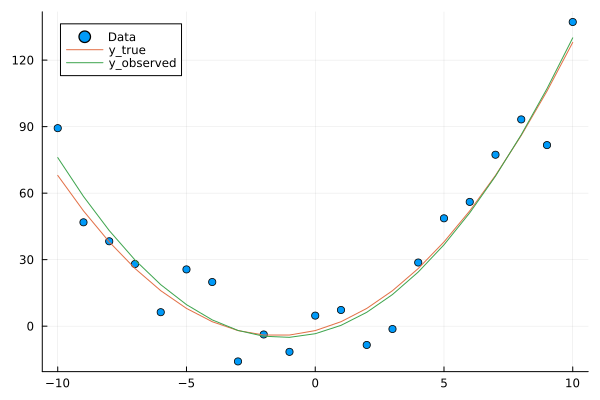

In [48]:
noises=10
d=di.Normal(0,noises)
y_observed=y_true+rand(d,length(x))
scatter(x,y_observed, label="Data")
plot!(x,y_true, label="y_true")
line_fit=Polynomials.fit(x,y_observed,2)
fit_coeff=coeffs(line_fit)
y_fitted=fit_coeff[1] .+ fit_coeff[2] .*x .+ fit_coeff[3] .*x .^2
plot!(x,y_fitted, label="y_fitted")

21-element Vector{Float64}:
  59.05688747418777
  43.675216344487275
  30.29072356084403
  18.903409123258026
   9.513273031729263
   2.1203152862577497
  -3.27546411315652
  -6.674065166513547
  -8.075487873813326
  -7.479732235055864
  -4.886798250241152
  -0.2966859193692033
   6.290604757559997
  14.875073780546433
  25.456721149590123
  38.03554686469105
  52.61155092584923
  69.18473333306466
  87.75509408633731
 108.32263318566721
 130.88735063105437

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

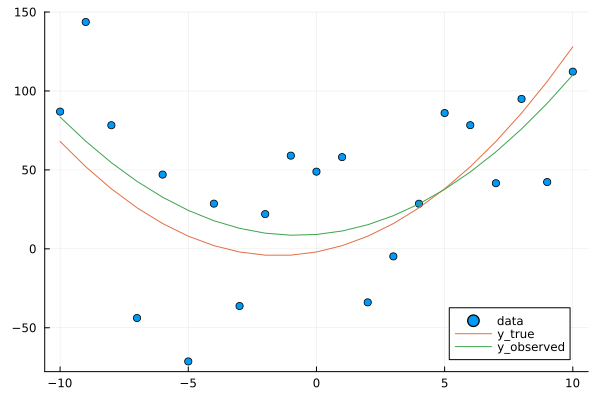

In [49]:
noises=50
d=di.Normal(0,noises)
y_observed=y_true+rand(d,length(x))
scatter(x,y_observed, label="data")
plot!(x,y_true, label="y_true")
line_fit=Polynomials.fit(x,y_observed,2)
fit_coeff=coeffs(line_fit)
y_fitted=fit_coeff[1] .+ fit_coeff[2] .*x .+ fit_coeff[3] .*x .^2
plot!(x,y_fitted, label="y_fitted")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

the fit is less close to y_true because there is more noise and therefore uncertainty 

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


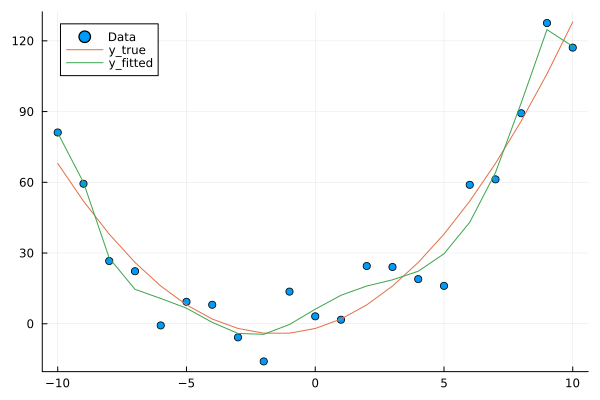

In [53]:
noises=10
d=di.Normal(0,noises)
y_observed=y_true+rand(d,length(x))
scatter(x,y_observed, label="Data")
plot!(x,y_true, label="y_true")
line_fit=Polynomials.fit(x,y_observed,10)
fit_coeff=coeffs(line_fit)
y_fitted=line_fit.(x)
plot!(x,y_fitted, label="y_fitted")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


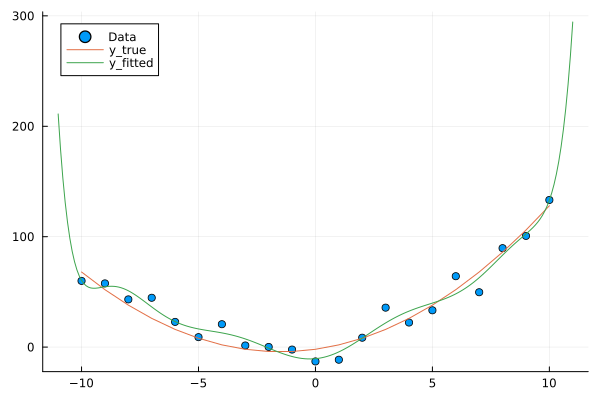

In [5]:
x_fit=(-11:0.1:11)
noises=10
d=di.Normal(0,noises)
y_observed=y_true+rand(d,length(x))
scatter(x,y_observed, label="Data")
plot!(x,y_true, label="y_true")
line_fit=Polynomials.fit(x,y_observed,10)
fit_coeff=coeffs(line_fit)
y_fitted=line_fit.(x_fit)
plot!(x_fit,y_fitted, label="y_fitted")

3. What do you observe in the plot? What is this phenomenon called?

I observe the y_fitted matching the y_true more closely but is going up and down more. The polynomial may match this data but will not be able to predict future data. The phenomena is called overfitting.